## Loading the data and other imports

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
import joblib
from scipy.stats import chi2_contingency

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [50]:
df = pd.read_csv('tourist_details.csv')

## Exploratory Data Analysis

In [51]:
df.shape

(8727, 21)

In [52]:
df.head()

,User_ID,User_Location,User_Locale,User_Contributions,Travel_Date,Published_Date,Rating,Helpful_Votes,number_of_times_abroad,Age,...,Duration of Stay (Days),Monthly Income (USD),Preferred Activities 1,Preferred Activities 2,Preferred Activities 3,Preferred Travel Season,Preferred Mode of Transportation,Tech Savvy,Accommodation Type,Category
0,User 22,"Miami, Florida",en_US,15,18-Aug,2018-09-18T05:41:57-04:00,4,3,11,25.0,...,0m2w6d,1962.0,Water Sports,Camping,Hiking and Trekking,Fall,Public-Bus,Medium,Camping,Adventure & Active
1,User 30,"Turin, Italy",it,10,18-Jul,2018-07-28T06:19:31-04:00,4,0,10,22.0,...,0m1w3d,1953.0,Water Sports,Camping,Whale and Dolphin Watching,Fall,Train,Medium,Camping,Adventure & Active
2,User 38,"Yangon (Rangoon), Myanmar",en_US,42,18-Jul,2018-06-30T18:28:23-04:00,4,2,7,20.0,...,0m1w0d,1604.0,Whale and Dolphin Watching,Wildlife Safaris,Camping,Summer,Train,Medium,Hostel,Adventure & Active
3,User 42,"Port Coquitlam, Canada",en_CA,18,17-Aug,2017-08-27T17:20:50-04:00,5,2,2,26.0,...,0m1w1d,2176.0,Hiking and Trekking,Camping,Whale and Dolphin Watching,Fall,Car,Medium,Guesthouse,Adventure & Active
4,User 43,"Prague, Czech Republic",en_US,2,17-Aug,2017-08-26T23:47:03-04:00,3,2,13,29.0,...,0m1w5d,1824.0,Camping,Whale and Dolphin Watching,Water Sports,Fall,Public-Bus,Medium,Hostel,Adventure & Active


In [53]:
df.tail()

,User_ID,User_Location,User_Locale,User_Contributions,Travel_Date,Published_Date,Rating,Helpful_Votes,number_of_times_abroad,Age,...,Duration of Stay (Days),Monthly Income (USD),Preferred Activities 1,Preferred Activities 2,Preferred Activities 3,Preferred Travel Season,Preferred Mode of Transportation,Tech Savvy,Accommodation Type,Category
8722,User 8902,"Solihull, United Kingdom",en_US,27,19-Mar,2019-03-26T00:47:37-04:00,5,0,5,48.0,...,0m1w1d,8240.0,Lake and River,Hiking and Trekking,Events,Spring,PickMe,High,Camping,Luxury & Relaxation
8723,User 8942,"Jersey, United Kingdom",en_UK,32,17-May,2017-05-02T04:00:28-04:00,4,3,9,29.0,...,0m1w1d,3630.0,Boutique Hotels,Camping,Cultural Highlights,Fall,Train,High,Guesthouse,Luxury & Relaxation
8724,User 8944,"Newport Pagnell, United Kingdom",en_US,25,17-Apr,2017-04-14T18:11:33-04:00,5,0,3,58.0,...,0m3w1d,5311.0,Cultural Festivals,Whale and Dolphin Watching,Events,Fall,Bike,Medium,Hostel,Luxury & Relaxation
8725,User 8973,"Gold Coast, Australia",en_US,62,15-Jun,2015-06-12T03:48:31-04:00,2,1,3,48.0,...,0m0w6d,4370.0,Whale and Dolphin Watching,Religious Sites,Wildlife Safaris,Winter,Car,Medium,Motel,Luxury & Relaxation
8726,User 8994,"Abu Dhabi, United Arab Emirates",en_US,10,18-Jul,2018-07-16T09:26:17-04:00,4,0,1,51.0,...,0m1w4d,4124.0,Cultural Highlights,Camping,Local Culinary Experiences,Winter,PickMe,Medium,Guesthouse,Luxury & Relaxation


In [54]:
df.columns

Index(['User_ID', 'User_Location', 'User_Locale', 'User_Contributions',
       'Travel_Date', 'Published_Date', 'Rating', 'Helpful_Votes',
       'number_of_times_abroad', 'Age', 'Travel Style',
       'Duration of Stay (Days)', 'Monthly Income (USD)',
       'Preferred Activities 1', 'Preferred Activities 2',
       'Preferred Activities 3', 'Preferred Travel Season',
       'Preferred Mode of Transportation', 'Tech Savvy', 'Accommodation Type',
       'Category'],
      dtype='object')

In [55]:
cl = [
       'number_of_times_abroad',  'Travel Style',
       
       'Preferred Activities 1', 'Preferred Activities 2',
       'Preferred Activities 3', 'Preferred Travel Season',
       'Preferred Mode of Transportation', 'Tech Savvy', 'Accommodation Type',
       'Category']

In [56]:
for i in cl:
    print(f'{i}: {df[i].unique()}')

number_of_times_abroad: [11 10  7  2 13  3  9  0  1  5  8  6 12 15  4 14]
Travel Style: ['group' 'solo' 'couples']
Preferred Activities 1: ['Water Sports' 'Whale and Dolphin Watching' 'Hiking and Trekking'
 'Camping' 'Wildlife Safaris' 'Boutique Hotels' 'Beaches' 'Ancient Cities'
 'Urban Attractions' 'Ayurvedic Spas' 'Colonial Heritage'
 'Religious Sites' 'Local Food' 'Waterfalls' 'Train Rides' 'Hill Country'
 'Local Culinary Experiences' 'Lake and River' 'Cultural Festivals'
 'Shopping' 'Cultural Highlights' 'Whale Watching' 'Events']
Preferred Activities 2: ['Camping' 'Wildlife Safaris' 'Whale and Dolphin Watching' 'Water Sports'
 'Hiking and Trekking' 'Ancient Cities' 'Events' 'Cultural Highlights'
 'Shopping' 'Urban Attractions' 'Colonial Heritage' 'Hill Country'
 'Religious Sites' 'Ayurvedic Spas' 'Beaches' 'Waterfalls' 'Train Rides'
 'Local Food' 'Local Culinary Experiences' 'Cultural Festivals'
 'Whale Watching' 'Boutique Hotels' 'Lake and River']
Preferred Activities 3: ['Hikin

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8727 entries, 0 to 8726
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   User_ID                           8727 non-null   object 
 1   User_Location                     8727 non-null   object 
 2   User_Locale                       8727 non-null   object 
 3   User_Contributions                8727 non-null   int64  
 4   Travel_Date                       8727 non-null   object 
 5   Published_Date                    8727 non-null   object 
 6   Rating                            8727 non-null   int64  
 7   Helpful_Votes                     8727 non-null   int64  
 8   number_of_times_abroad            8727 non-null   int64  
 9   Age                               8727 non-null   float64
 10  Travel Style                      8727 non-null   object 
 11  Duration of Stay (Days)           8727 non-null   object 
 12  Monthl

In [58]:
df.describe()

,User_Contributions,Rating,Helpful_Votes,number_of_times_abroad,Age,Monthly Income (USD)
count,8727.000000,8727.000000,8727.000000,8727.000000,8727.000000,8727.000000
mean,100.245904,4.128910,0.745846,6.467515,38.906841,4139.041022
std,246.528115,1.066545,3.848231,4.187620,12.618366,2217.055117
min,1.000000,1.000000,0.000000,0.000000,18.000000,1202.000000
25%,12.000000,4.000000,0.000000,3.000000,28.000000,2178.000000
50%,35.000000,4.000000,0.000000,6.000000,40.000000,3583.000000
75%,96.000000,5.000000,1.000000,10.000000,49.000000,5941.000000
max,6070.000000,5.000000,233.000000,15.000000,70.000000,9995.000000


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Adventure & Active'),
  Text(1, 0, 'Budget Travelers'),
  Text(2, 0, 'Business & Work-Related'),
  Text(3, 0, 'Cultural & Heritage'),
  Text(4, 0, 'Luxury & Relaxation')])

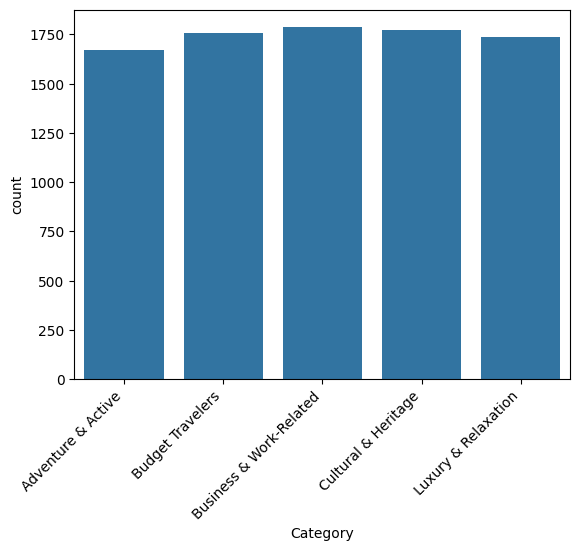

In [59]:
sns.countplot(x='Category',data=df)
plt.xticks(rotation=45, ha='right')

In [60]:
# def remove_outliers(group):
#     Q1 = group['Age'].quantile(0.25)
#     Q3 = group['Age'].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR 
    
#     return group[(group['Age'] >= lower_bound) & (group['Age'] <= upper_bound)]




In [61]:
# df = df.groupby('Category').apply(remove_outliers).reset_index(drop=True)

In [ ]:
sns.boxplot(x='Category',y='Age',data=df)
plt.xticks(rotation=45, ha='right')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Adventure & Active'),
  Text(1, 0, 'Budget Travelers'),
  Text(2, 0, 'Business & Work-Related'),
  Text(3, 0, 'Cultural & Heritage'),
  Text(4, 0, 'Luxury & Relaxation')])

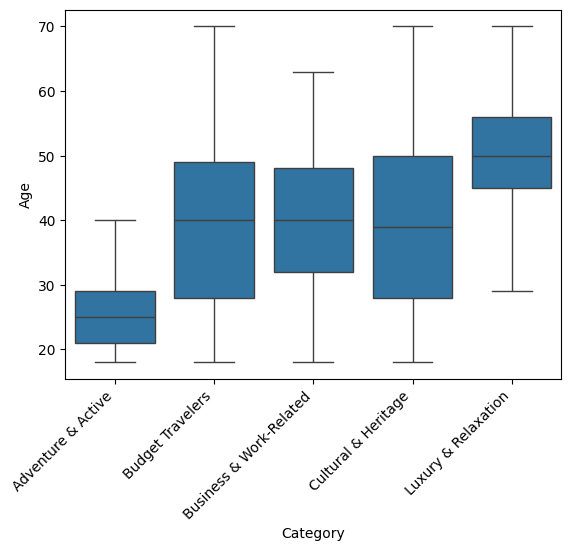

In [62]:
sns.boxplot(x='Category',y='Age',data=df)
plt.xticks(rotation=45, ha='right')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Adventure & Active'),
  Text(1, 0, 'Budget Travelers'),
  Text(2, 0, 'Business & Work-Related'),
  Text(3, 0, 'Cultural & Heritage'),
  Text(4, 0, 'Luxury & Relaxation')])

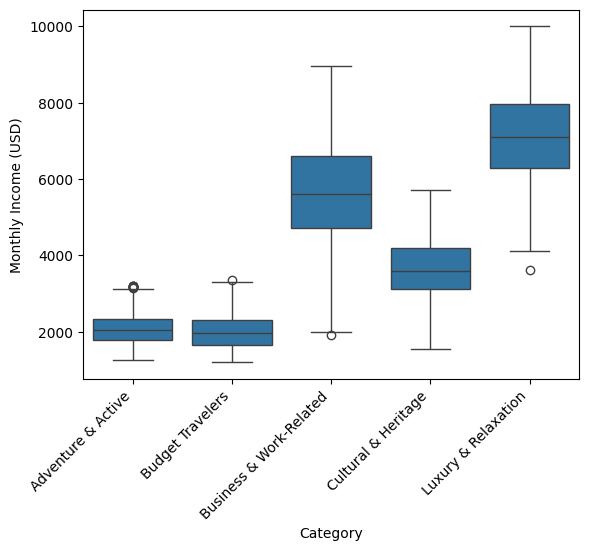

In [63]:
sns.boxplot(x='Category',y='Monthly Income (USD)',data=df)
plt.xticks(rotation=45, ha='right')

In [47]:
df.shape

(8727, 21)

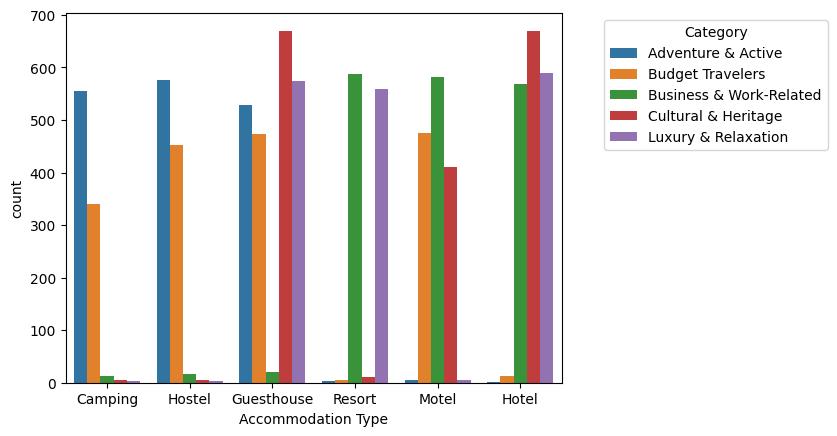

In [75]:
sns.countplot(x='Accommodation Type',data=df,hue='Category')
plt.legend(title='Category', loc='upper right', bbox_to_anchor=(1.55, 1.), ncol=1)

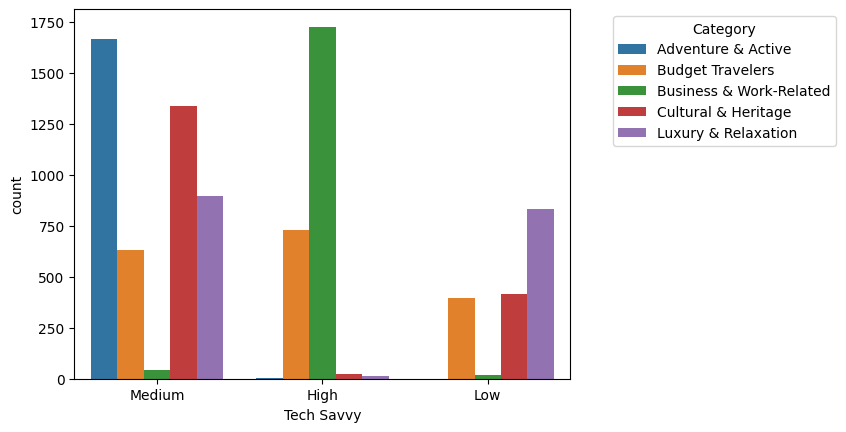

In [74]:
sns.countplot(x='Tech Savvy',data=df,hue='Category')
plt.legend(title='Category', loc='upper right', bbox_to_anchor=(1.55, 1.), ncol=1)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Public-Bus'),
  Text(1, 0, 'Train'),
  Text(2, 0, 'Car'),
  Text(3, 0, 'Van'),
  Text(4, 0, 'Bike'),
  Text(5, 0, 'AC-Bus'),
  Text(6, 0, 'scooter'),
  Text(7, 0, 'PickMe'),
  Text(8, 0, 'Uber'),
  Text(9, 0, 'Tuk-tuk')])

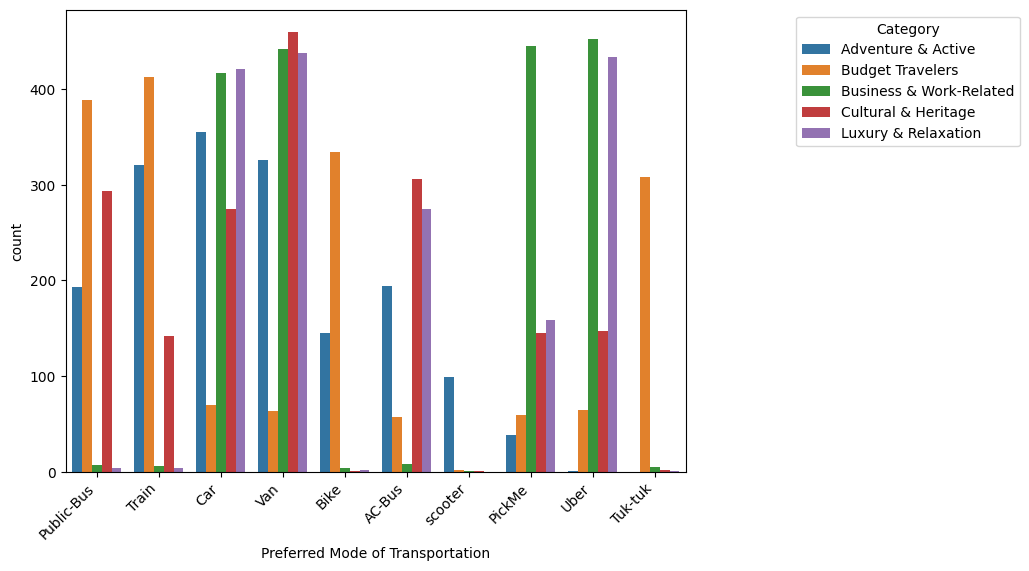

In [73]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Preferred Mode of Transportation',data=df,hue='Category')
plt.legend(title='Category', loc='upper right', bbox_to_anchor=(1.55, 1.), ncol=1)
plt.xticks(rotation=45, ha='right')

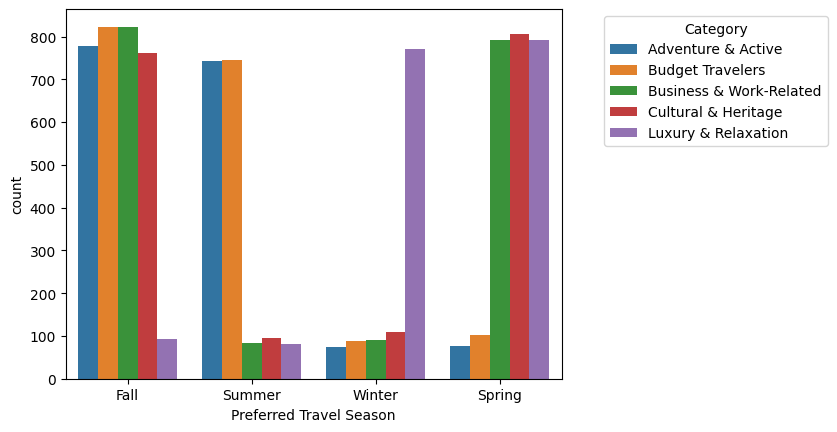

In [71]:
sns.countplot(x='Preferred Travel Season',data=df,hue='Category')
plt.legend(title='Category', loc='upper right', bbox_to_anchor=(1.55, 1.), ncol=1)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'Water Sports'),
  Text(1, 0, 'Whale and Dolphin Watching'),
  Text(2, 0, 'Hiking and Trekking'),
  Text(3, 0, 'Camping'),
  Text(4, 0, 'Wildlife Safaris'),
  Text(5, 0, 'Boutique Hotels'),
  Text(6, 0, 'Beaches'),
  Text(7, 0, 'Ancient Cities'),
  Text(8, 0, 'Urban Attractions'),
  Text(9, 0, 'Ayurvedic Spas'),
  Text(10, 0, 'Colonial Heritage'),
  Text(11, 0, 'Religious Sites'),
  Text(12, 0, 'Local Food'),
  Text(13, 0, 'Waterfalls'),
  Text(14, 0, 'Train Rides'),
  Text(15, 0, 'Hill Country'),
  Text(16, 0, 'Local Culinary Experiences'),
  Text(17, 0, 'Lake and River'),
  Text(18, 0, 'Cultural Festivals'),
  Text(19, 0, 'Shopping'),
  Text(20, 0, 'Cultural Highlights'),
  Text(21, 0, 'Whale Watching'),
  Text(22, 0, 'Events')])

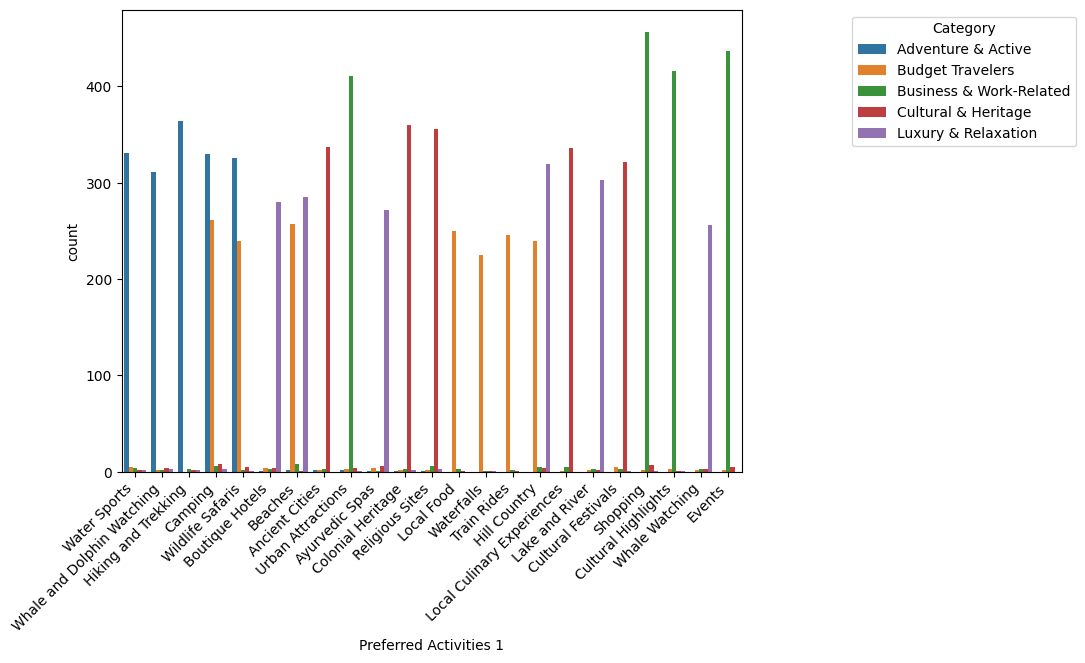

In [70]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Preferred Activities 1',data=df,hue='Category')
plt.legend(title='Category', loc='upper right', bbox_to_anchor=(1.55, 1.), ncol=1)
plt.xticks(rotation=45, ha='right')

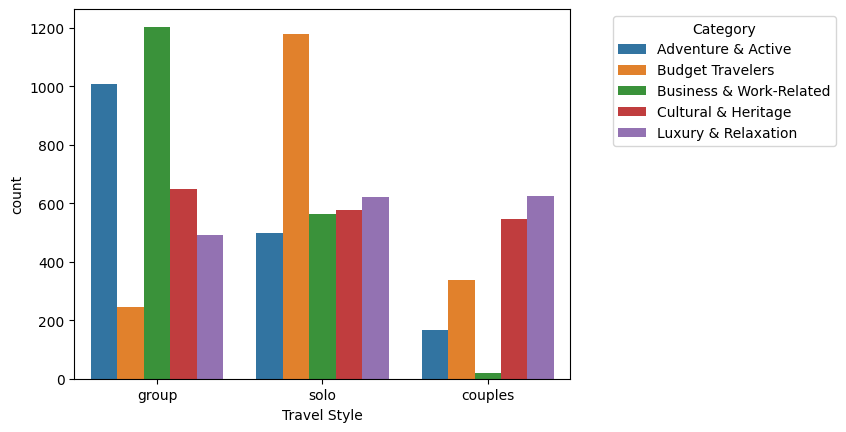

In [65]:
sns.countplot(x='Travel Style',data=df,hue='Category')
plt.legend(title='Category', loc='upper right', bbox_to_anchor=(1.55, 1.), ncol=1)

### convert Duration of Stay to days

In [76]:
def duration_to_days(duration):
    import re
    match = re.match(r'(?:(\d+)m)?(?:(\d+)w)?(?:(\d+)d)?', duration)
    if match:
        months = int(match.group(1)) if match.group(1) else 0
        weeks = int(match.group(2)) if match.group(2) else 0
        days = int(match.group(3)) if match.group(3) else 0
        # Convert to total days
        total_days = months * 30 + weeks * 7 + days
        return total_days
    return 0

In [77]:
df.columns

Index(['User_ID', 'User_Location', 'User_Locale', 'User_Contributions',
       'Travel_Date', 'Published_Date', 'Rating', 'Helpful_Votes',
       'number_of_times_abroad', 'Age', 'Travel Style',
       'Duration of Stay (Days)', 'Monthly Income (USD)',
       'Preferred Activities 1', 'Preferred Activities 2',
       'Preferred Activities 3', 'Preferred Travel Season',
       'Preferred Mode of Transportation', 'Tech Savvy', 'Accommodation Type',
       'Category'],
      dtype='object')

In [78]:
df['Duration of Stay (Days)'] = df['Duration of Stay (Days)'].apply(duration_to_days)

In [79]:
df.head()

,User_ID,User_Location,User_Locale,User_Contributions,Travel_Date,Published_Date,Rating,Helpful_Votes,number_of_times_abroad,Age,...,Duration of Stay (Days),Monthly Income (USD),Preferred Activities 1,Preferred Activities 2,Preferred Activities 3,Preferred Travel Season,Preferred Mode of Transportation,Tech Savvy,Accommodation Type,Category
0,User 22,"Miami, Florida",en_US,15,18-Aug,2018-09-18T05:41:57-04:00,4,3,11,25.0,...,20,1962.0,Water Sports,Camping,Hiking and Trekking,Fall,Public-Bus,Medium,Camping,Adventure & Active
1,User 30,"Turin, Italy",it,10,18-Jul,2018-07-28T06:19:31-04:00,4,0,10,22.0,...,10,1953.0,Water Sports,Camping,Whale and Dolphin Watching,Fall,Train,Medium,Camping,Adventure & Active
2,User 38,"Yangon (Rangoon), Myanmar",en_US,42,18-Jul,2018-06-30T18:28:23-04:00,4,2,7,20.0,...,7,1604.0,Whale and Dolphin Watching,Wildlife Safaris,Camping,Summer,Train,Medium,Hostel,Adventure & Active
3,User 42,"Port Coquitlam, Canada",en_CA,18,17-Aug,2017-08-27T17:20:50-04:00,5,2,2,26.0,...,8,2176.0,Hiking and Trekking,Camping,Whale and Dolphin Watching,Fall,Car,Medium,Guesthouse,Adventure & Active
4,User 43,"Prague, Czech Republic",en_US,2,17-Aug,2017-08-26T23:47:03-04:00,3,2,13,29.0,...,12,1824.0,Camping,Whale and Dolphin Watching,Water Sports,Fall,Public-Bus,Medium,Hostel,Adventure & Active


### analyze the association between each independent variable and the Category

#### categorical features and Category

In [80]:
categorical_features =list(df.select_dtypes(['object']).columns)[:-1]
categorical_features

['User_ID',
 'User_Location',
 'User_Locale',
 'Travel_Date',
 'Published_Date',
 'Travel Style',
 'Preferred Activities 1',
 'Preferred Activities 2',
 'Preferred Activities 3',
 'Preferred Travel Season',
 'Preferred Mode of Transportation',
 'Tech Savvy',
 'Accommodation Type']

In [81]:
def cramers_v_and_p(matrix):
    chi2, p, _, _ = chi2_contingency(matrix)
    n = matrix.sum().sum()
    r, k = matrix.shape
    cramers_v = np.sqrt(chi2 / (n * (min(r, k) - 1)))
    return cramers_v, p

In [82]:
results = []

for features in categorical_features:

    matrix = pd.crosstab(df[features], df['Category'])
    
    cv, p_value = cramers_v_and_p(matrix)
    results.append((features, cv, p_value))

In [83]:
results_df = pd.DataFrame(results, columns=['categorical features', 'Cramér\'s V', 'p-value'])

In [84]:
results_df['Significant'] = results_df['p-value'] < 0.05

In [85]:
results_df

,categorical features,Cramér's V,p-value,Significant
0,User_ID,1.000000,0.492954,False
1,User_Location,0.576521,0.585008,False
2,User_Locale,0.093549,0.401202,False
3,Travel_Date,0.130995,0.177847,False
4,Published_Date,1.000000,0.492954,False
5,Travel Style,0.341066,0.000000,True
6,Preferred Activities 1,0.887004,0.000000,True
7,Preferred Activities 2,0.889956,0.000000,True
8,Preferred Activities 3,0.889357,0.000000,True
9,Preferred Travel Season,0.433695,0.000000,True


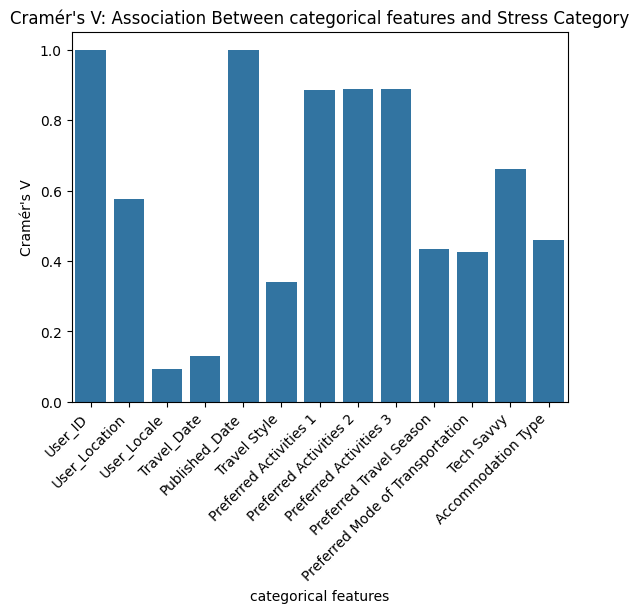

In [86]:
sns.barplot(x='categorical features', y='Cramér\'s V', data=results_df)
plt.xticks(rotation=45, ha='right')
plt.title('Cramér\'s V: Association Between categorical features and Stress Category')
plt.ylabel('Cramér\'s V')
plt.show()

In [87]:
df.drop(['User_ID',
 'User_Location',
 'User_Locale',
 'Travel_Date',
 'Published_Date'], axis=1, inplace=True)

In [88]:
categorical_features =list(df.select_dtypes(['object']).columns)[:-1]
categorical_features

['Travel Style',
 'Preferred Activities 1',
 'Preferred Activities 2',
 'Preferred Activities 3',
 'Preferred Travel Season',
 'Preferred Mode of Transportation',
 'Tech Savvy',
 'Accommodation Type']

#### Numerical features and Category

In [89]:
le = LabelEncoder()
df['Category Encoded'] = le.fit_transform(df['Category'])

In [90]:
corr_for_numerical = df.drop(categorical_features + ["Category"], axis=1).corr()
corr_for_numerical

,User_Contributions,Rating,Helpful_Votes,number_of_times_abroad,Age,Duration of Stay (Days),Monthly Income (USD),Category Encoded
User_Contributions,1.000000,-0.050237,0.005977,0.005524,-0.015497,-0.014863,-0.005529,-0.011399
Rating,-0.050237,1.000000,-0.035826,-0.014342,0.006853,-0.002491,0.000703,-0.007158
Helpful_Votes,0.005977,-0.035826,1.000000,0.024008,0.004067,0.001454,-0.006445,-0.005237
number_of_times_abroad,0.005524,-0.014342,0.024008,1.000000,-0.015745,-0.002333,-0.007267,-0.010436
Age,-0.015497,0.006853,0.004067,-0.015745,1.000000,-0.061709,0.590374,0.560694
Duration of Stay (Days),-0.014863,-0.002491,0.001454,-0.002333,-0.061709,1.000000,-0.293531,-0.058476
Monthly Income (USD),-0.005529,0.000703,-0.006445,-0.007267,0.590374,-0.293531,1.000000,0.758578
Category Encoded,-0.011399,-0.007158,-0.005237,-0.010436,0.560694,-0.058476,0.758578,1.000000


In [91]:
corr_for_numerical["Category Encoded"]

User_Contributions        -0.011399
Rating                    -0.007158
Helpful_Votes             -0.005237
number_of_times_abroad    -0.010436
Age                        0.560694
Duration of Stay (Days)   -0.058476
Monthly Income (USD)       0.758578
Category Encoded           1.000000
Name: Category Encoded, dtype: float64

<Axes: ylabel='Category Encoded'>

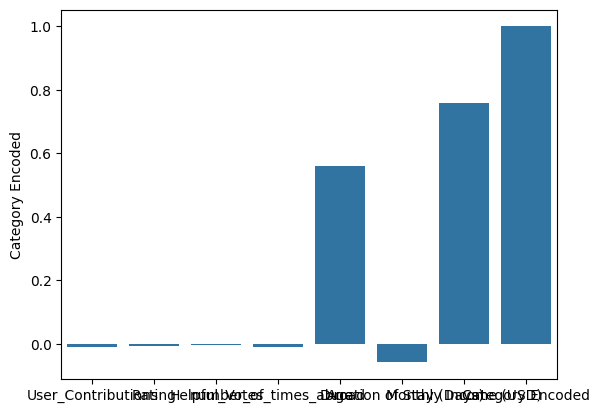

In [93]:
sns.barplot( data=corr_for_numerical["Category Encoded"] )

In [94]:
df.drop("Category Encoded", axis=1, inplace=True)

In [95]:
df.columns

Index(['User_Contributions', 'Rating', 'Helpful_Votes',
       'number_of_times_abroad', 'Age', 'Travel Style',
       'Duration of Stay (Days)', 'Monthly Income (USD)',
       'Preferred Activities 1', 'Preferred Activities 2',
       'Preferred Activities 3', 'Preferred Travel Season',
       'Preferred Mode of Transportation', 'Tech Savvy', 'Accommodation Type',
       'Category'],
      dtype='object')

In [96]:
df.drop(["User_Contributions", "Rating", "Helpful_Votes", "number_of_times_abroad", "Duration of Stay (Days)"], axis=1, inplace=True)

## Data PreProcessing

In [97]:
df.head()

,Age,Travel Style,Monthly Income (USD),Preferred Activities 1,Preferred Activities 2,Preferred Activities 3,Preferred Travel Season,Preferred Mode of Transportation,Tech Savvy,Accommodation Type,Category
0,25.0,group,1962.0,Water Sports,Camping,Hiking and Trekking,Fall,Public-Bus,Medium,Camping,Adventure & Active
1,22.0,group,1953.0,Water Sports,Camping,Whale and Dolphin Watching,Fall,Train,Medium,Camping,Adventure & Active
2,20.0,solo,1604.0,Whale and Dolphin Watching,Wildlife Safaris,Camping,Summer,Train,Medium,Hostel,Adventure & Active
3,26.0,solo,2176.0,Hiking and Trekking,Camping,Whale and Dolphin Watching,Fall,Car,Medium,Guesthouse,Adventure & Active
4,29.0,group,1824.0,Camping,Whale and Dolphin Watching,Water Sports,Fall,Public-Bus,Medium,Hostel,Adventure & Active


In [98]:
df.isnull().sum()

Age                                 0
Travel Style                        0
Monthly Income (USD)                0
Preferred Activities 1              0
Preferred Activities 2              0
Preferred Activities 3              0
Preferred Travel Season             0
Preferred Mode of Transportation    0
Tech Savvy                          0
Accommodation Type                  0
Category                            0
dtype: int64

#### split dataset into training and testing sets

In [152]:
X = df.drop("Category", axis=1)
y = df["Category"]

#### Categorical Variables Handling

In [100]:
cat_features = list(X.select_dtypes(['object']).columns)
cat_features

['Travel Style',
 'Preferred Activities 1',
 'Preferred Activities 2',
 'Preferred Activities 3',
 'Preferred Travel Season',
 'Preferred Mode of Transportation',
 'Tech Savvy',
 'Accommodation Type']

In [102]:
preprocessor = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(handle_unknown='ignore'), cat_features)],
    remainder='passthrough')

In [153]:
X = preprocessor.fit_transform(X)


In [39]:
# dense_X = X.toarray()
# print(dense_X)

In [154]:
joblib.dump(preprocessor, 'preprocessor.pkl')

['preprocessor.pkl']

#### Train Test Split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Models Training 

In [105]:
df["Category"].unique()

array(['Adventure & Active', 'Budget Travelers',
       'Business & Work-Related', 'Cultural & Heritage',
       'Luxury & Relaxation'], dtype=object)

In [106]:
classes = ['Adventure & Active', 'Budget Travelers',
       'Business & Work-Related', 'Cultural & Heritage',
       'Luxury & Relaxation']

def plot_confusion_matrix(y_true, y_pred, classes, figsize=(6, 4), cmap=plt.cm.Blues):

    cm = confusion_matrix(y_true, y_pred) 
    
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True, cmap=cmap, fmt=".2f", xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix')
    plt.show()

### SVM

In [107]:
svm_classifier = SVC(kernel='linear')

In [111]:
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [112]:
y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("SVM_Accuracy:", accuracy*100)

print(classification_report(y_test, y_pred))

SVM_Accuracy: 97.97632684230622
                         precision    recall  f1-score   support

     Adventure & Active       0.99      0.99      0.99       542
       Budget Travelers       0.98      0.97      0.98       515
Business & Work-Related       0.98      0.98      0.98       518
    Cultural & Heritage       0.97      0.98      0.97       541
    Luxury & Relaxation       0.99      0.98      0.99       503

               accuracy                           0.98      2619
              macro avg       0.98      0.98      0.98      2619
           weighted avg       0.98      0.98      0.98      2619



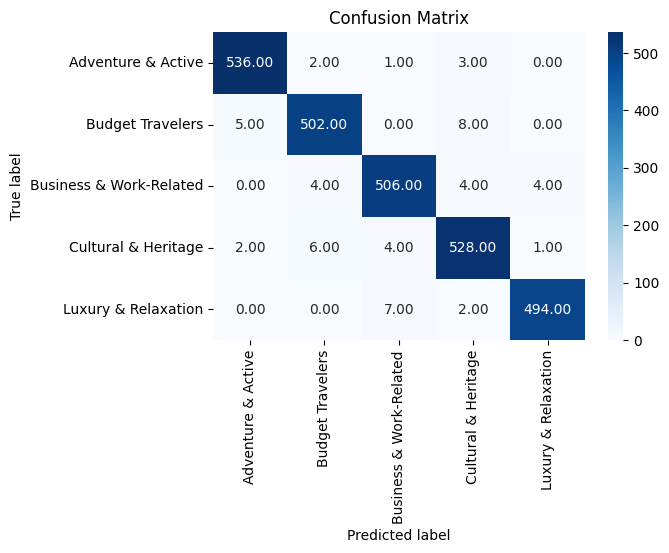

In [113]:
plot_confusion_matrix(y_test, y_pred, classes)

### KNN

In [114]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

In [115]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [116]:
y_pred_knn = knn_classifier.predict(X_test)

In [117]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn*100)


print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 77.1668575792287
                         precision    recall  f1-score   support

     Adventure & Active       0.80      0.87      0.83       542
       Budget Travelers       0.88      0.79      0.83       515
Business & Work-Related       0.63      0.58      0.61       518
    Cultural & Heritage       0.81      0.84      0.82       541
    Luxury & Relaxation       0.73      0.78      0.75       503

               accuracy                           0.77      2619
              macro avg       0.77      0.77      0.77      2619
           weighted avg       0.77      0.77      0.77      2619



In [119]:
confusion_matrix(y_test,y_pred_knn)

array([[469,  47,   0,  26,   0],
       [104, 408,   0,   3,   0],
       [  1,   3, 300,  73, 141],
       [ 13,   7,  66, 454,   1],
       [  0,   0, 107,   6, 390]], dtype=int64)

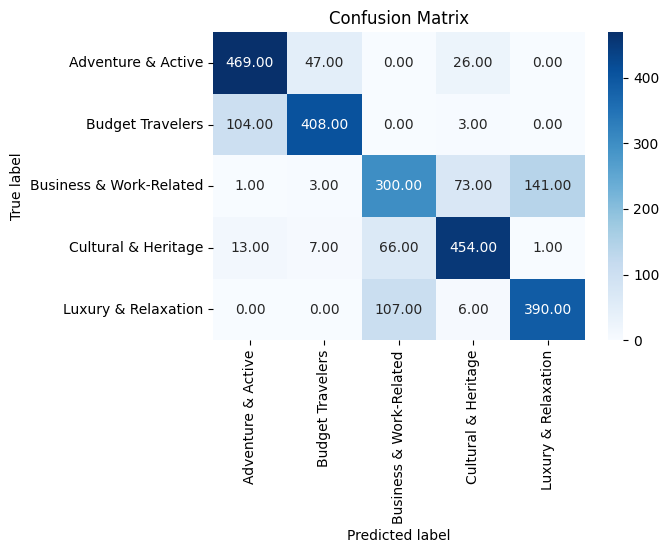

In [120]:
plot_confusion_matrix(y_test, y_pred_knn, classes)

## MLPClassifier

In [121]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)

In [122]:
mlp_classifier.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)

In [123]:
y_pred_mlp = mlp_classifier.predict(X_test)

In [124]:
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("MLPClassifier Accuracy:", accuracy_mlp*100)

print(classification_report(y_test, y_pred_mlp))

MLPClassifier Accuracy: 98.24360442917144
                         precision    recall  f1-score   support

     Adventure & Active       0.99      0.99      0.99       542
       Budget Travelers       0.98      0.99      0.98       515
Business & Work-Related       0.97      0.98      0.98       518
    Cultural & Heritage       0.98      0.97      0.98       541
    Luxury & Relaxation       0.99      0.98      0.99       503

               accuracy                           0.98      2619
              macro avg       0.98      0.98      0.98      2619
           weighted avg       0.98      0.98      0.98      2619



In [125]:
confusion_matrix(y_test,y_pred_mlp)

array([[537,   1,   1,   3,   0],
       [  2, 508,   0,   4,   1],
       [  0,   4, 509,   1,   4],
       [  2,   7,   7, 525,   0],
       [  0,   0,   8,   1, 494]], dtype=int64)

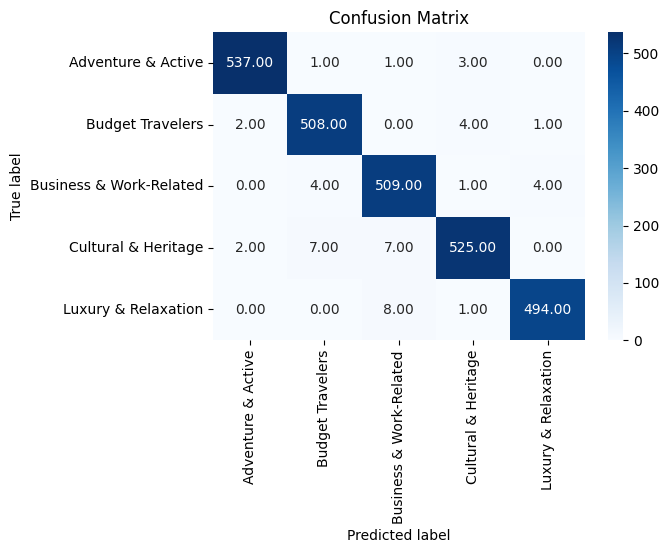

In [126]:
plot_confusion_matrix(y_test, y_pred_mlp, classes)

## Random Forest Classifier

In [127]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [128]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [129]:
y_pred_rf = rf_classifier.predict(X_test)

In [130]:
accuracy_mlp = accuracy_score(y_test, y_pred_rf)
print("RF_Classifier Accuracy:", accuracy_mlp*100)

print(classification_report(y_test, y_pred_rf))

RF_Classifier Accuracy: 97.8999618174876


                         precision    recall  f1-score   support

     Adventure & Active       0.98      0.99      0.99       542
       Budget Travelers       0.97      0.98      0.98       515
Business & Work-Related       0.98      0.97      0.97       518
    Cultural & Heritage       0.98      0.97      0.97       541
    Luxury & Relaxation       0.99      0.98      0.99       503

               accuracy                           0.98      2619
              macro avg       0.98      0.98      0.98      2619
           weighted avg       0.98      0.98      0.98      2619



In [131]:
confusion_matrix(y_test,y_pred_rf)

array([[537,   3,   0,   2,   0],
       [  4, 507,   1,   2,   1],
       [  0,   6, 503,   6,   3],
       [  5,   8,   3, 524,   1],
       [  0,   0,   8,   2, 493]], dtype=int64)

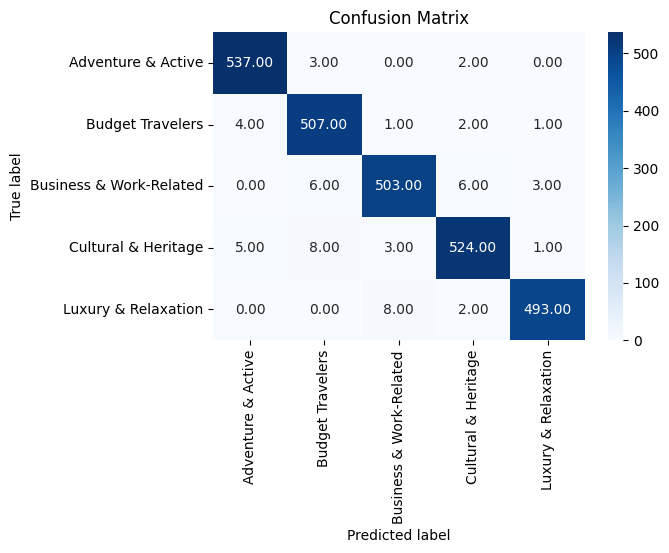

In [132]:
plot_confusion_matrix(y_test, y_pred_rf, classes)

## Save Best Model

In [133]:
with open('RF_model.pkl', 'wb') as file:
    pickle.dump(rf_classifier, file)

## check predictions

In [4]:
with open('RF_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [5]:
loaded_preprocessor = joblib.load('preprocessor.pkl')

In [6]:
def get_prediction(df):
    x =loaded_preprocessor.transform(df) 
    y_pred = loaded_model.predict(x)
    print(y_pred[0])
    # return y_pred

In [7]:
data = pd.read_csv("forPrediction.csv")

In [8]:
data.head()

,Age,Travel Style,Monthly Income (USD),Preferred Activities 1,Preferred Activities 2,Preferred Activities 3,Preferred Travel Season,Preferred Mode of Transportation,Tech Savvy,Accommodation Type,Category
0,25.0,group,1962.0,Water Sports,Camping,Hiking and Trekking,Fall,Public-Bus,Medium,Camping,Adventure & Active
1,22.0,group,1953.0,Water Sports,Camping,Whale and Dolphin Watching,Fall,Train,Medium,Camping,Adventure & Active
2,20.0,solo,1604.0,Whale and Dolphin Watching,Wildlife Safaris,Camping,Summer,Train,Medium,Hostel,Adventure & Active
3,26.0,solo,2176.0,Hiking and Trekking,Camping,Whale and Dolphin Watching,Fall,Car,Medium,Guesthouse,Adventure & Active
4,29.0,group,1824.0,Camping,Whale and Dolphin Watching,Water Sports,Fall,Public-Bus,Medium,Hostel,Adventure & Active


In [9]:
data["Category"].unique()

array(['Adventure & Active', 'Budget Travelers',
       'Business & Work-Related', 'Cultural & Heritage',
       'Luxury & Relaxation'], dtype=object)

In [14]:
new = data[data["Category"]=="Cultural & Heritage"]

In [17]:
to_predict = new[2:3]
to_predict

,Age,Travel Style,Monthly Income (USD),Preferred Activities 1,Preferred Activities 2,Preferred Activities 3,Preferred Travel Season,Preferred Mode of Transportation,Tech Savvy,Accommodation Type,Category
5220,64.0,solo,4363.0,Colonial Heritage,Religious Sites,Cultural Festivals,Fall,Public-Bus,Low,Guesthouse,Cultural & Heritage


In [18]:
p= to_predict.drop("Category", axis=1)
p

,Age,Travel Style,Monthly Income (USD),Preferred Activities 1,Preferred Activities 2,Preferred Activities 3,Preferred Travel Season,Preferred Mode of Transportation,Tech Savvy,Accommodation Type
5220,64.0,solo,4363.0,Colonial Heritage,Religious Sites,Cultural Festivals,Fall,Public-Bus,Low,Guesthouse


In [19]:
get_prediction(p)



Cultural & Heritage
